In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as py

from sklearn.model_selection import train_test_split , GridSearchCV
#from sklearn.feature_selection import
 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score , classification_report , f1_score , confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier



In [88]:
weather = pd.read_csv("weather_classification_data.csv")
weather


,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


In [89]:
weather.shape

(13200, 11)

In [90]:
weather.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [91]:
weather.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type'],
      dtype='object')

In [92]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [93]:
weather["Cloud Cover"].value_counts()

Cloud Cover
overcast         6090
partly cloudy    4560
clear            2139
cloudy            411
Name: count, dtype: int64

In [94]:
for i in weather.columns:
    print("column name :-", i)
    print(weather[i].value_counts())
    print("="*60)

column name :- Temperature
Temperature
32.0     391
24.0     375
26.0     372
30.0     370
22.0     365
        ... 
102.0      1
86.0       1
108.0      1
87.0       1
95.0       1
Name: count, Length: 126, dtype: int64
column name :- Humidity
Humidity
76     313
60     309
67     295
63     291
70     288
      ... 
100     46
102     42
109     42
103     41
101     36
Name: count, Length: 90, dtype: int64
column name :- Wind Speed
Wind Speed
8.0     470
9.5     463
9.0     456
6.5     454
6.0     436
       ... 
40.5      2
45.5      1
46.0      1
47.5      1
48.5      1
Name: count, Length: 97, dtype: int64
column name :- Precipitation (%)
Precipitation (%)
19.0     222
14.0     213
16.0     211
18.0     206
17.0     203
        ... 
104.0     41
100.0     39
106.0     38
102.0     38
105.0     37
Name: count, Length: 110, dtype: int64
column name :- Cloud Cover
Cloud Cover
overcast         6090
partly cloudy    4560
clear            2139
cloudy            411
Name: count, dtype: 

In [95]:
weather.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


<Axes: xlabel='Weather Type', ylabel='count'>

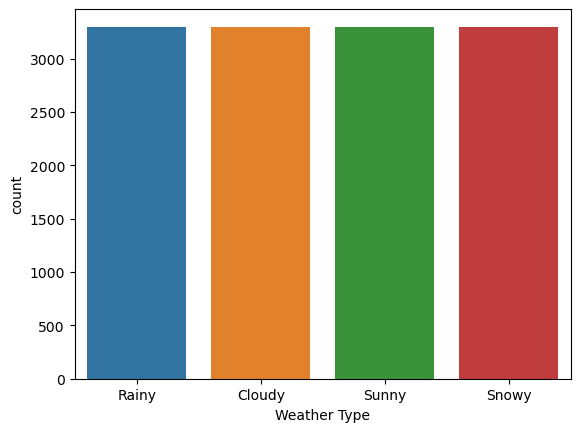

In [96]:
sns.countplot(x=weather["Weather Type"])

<Axes: xlabel='Season', ylabel='count'>

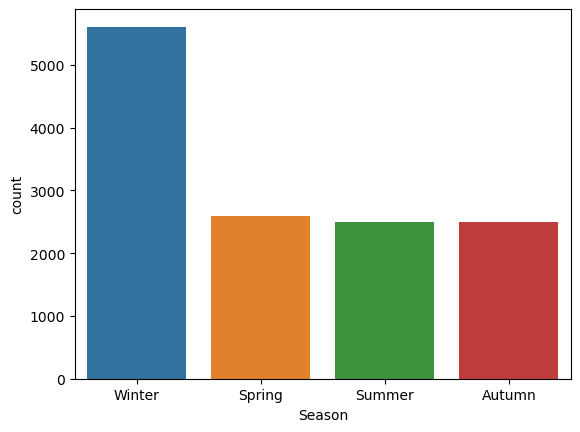

In [97]:
sns.countplot(x=weather["Season"])

<Axes: >

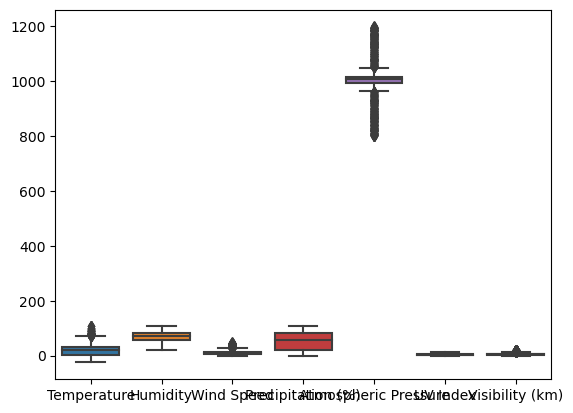

In [98]:
sns.boxplot(weather)


In [99]:
weather.head(5)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [100]:
weather["Cloud Cover"].replace({"overcast":0, "partly cloudy":1 , "clear":2 ,"cloudy" :3}, inplace=True)

In [101]:
weather["Season"].replace({"Winter":0 , "Spring":1 , "Autumn":2 , "Summer":3}, inplace=True)


In [102]:
weather["Location"].replace({"inland":0 , "mountain":1 , "coastal":2},inplace=True)

In [103]:
weather["Weather Type"].replace({"Rainy":0, "Cloudy":1 , "Sunny":2 , "Snowy":3 }, inplace=True)

In [104]:
weather.head(5)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,1,1010.82,2,0,3.5,0,0
1,39.0,96,8.5,71.0,1,1011.43,7,1,10.0,0,1
2,30.0,64,7.0,16.0,2,1018.72,5,1,5.5,1,2
3,38.0,83,1.5,82.0,2,1026.25,7,1,1.0,2,2
4,27.0,74,17.0,66.0,0,990.67,1,0,2.5,1,0


In [105]:
weather.tail(5)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
13195,10.0,74,14.5,71.0,0,1003.15,1,3,1.0,1,0
13196,-1.0,76,3.5,23.0,3,1067.23,1,0,6.0,2,3
13197,30.0,77,5.5,28.0,0,1012.69,3,2,9.0,2,1
13198,3.0,76,10.0,94.0,0,984.27,0,0,2.0,0,3
13199,-5.0,38,0.0,92.0,0,1015.37,5,2,10.0,1,0


In [106]:
#sns.pairplot(weather)

In [107]:
weather.corr()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
Temperature,1.000000,-0.207969,-0.070022,-0.287206,0.354483,0.209188,0.374773,0.381422,0.250751,0.189524,-0.407396
Humidity,-0.207969,1.000000,0.406079,0.638631,-0.450718,-0.120653,-0.342694,-0.174724,-0.479969,-0.092175,-0.081860
Wind Speed,-0.070022,0.406079,1.000000,0.443770,-0.267833,-0.077757,-0.068147,-0.046682,-0.311828,-0.031476,-0.172076
Precipitation (%),-0.287206,0.638631,0.443770,1.000000,-0.431144,-0.177444,-0.291601,-0.204950,-0.457444,-0.100080,-0.055412
Cloud Cover,0.354483,-0.450718,-0.267833,-0.431144,1.000000,0.151389,0.491863,0.196124,0.409742,0.103671,0.101633
Atmospheric Pressure,0.209188,-0.120653,-0.077757,-0.177444,0.151389,1.000000,0.154128,0.115970,0.120182,0.062520,-0.094754
UV Index,0.374773,-0.342694,-0.068147,-0.291601,0.491863,0.154128,1.000000,0.206876,0.362922,0.090593,0.058527
Season,0.381422,-0.174724,-0.046682,-0.204950,0.196124,0.115970,0.206876,1.000000,0.221317,0.152329,-0.383587
Visibility (km),0.250751,-0.479969,-0.311828,-0.457444,0.409742,0.120182,0.362922,0.221317,1.000000,0.104598,0.012547
Location,0.189524,-0.092175,-0.031476,-0.100080,0.103671,0.062520,0.090593,0.152329,0.104598,1.000000,-0.202935


<Axes: >

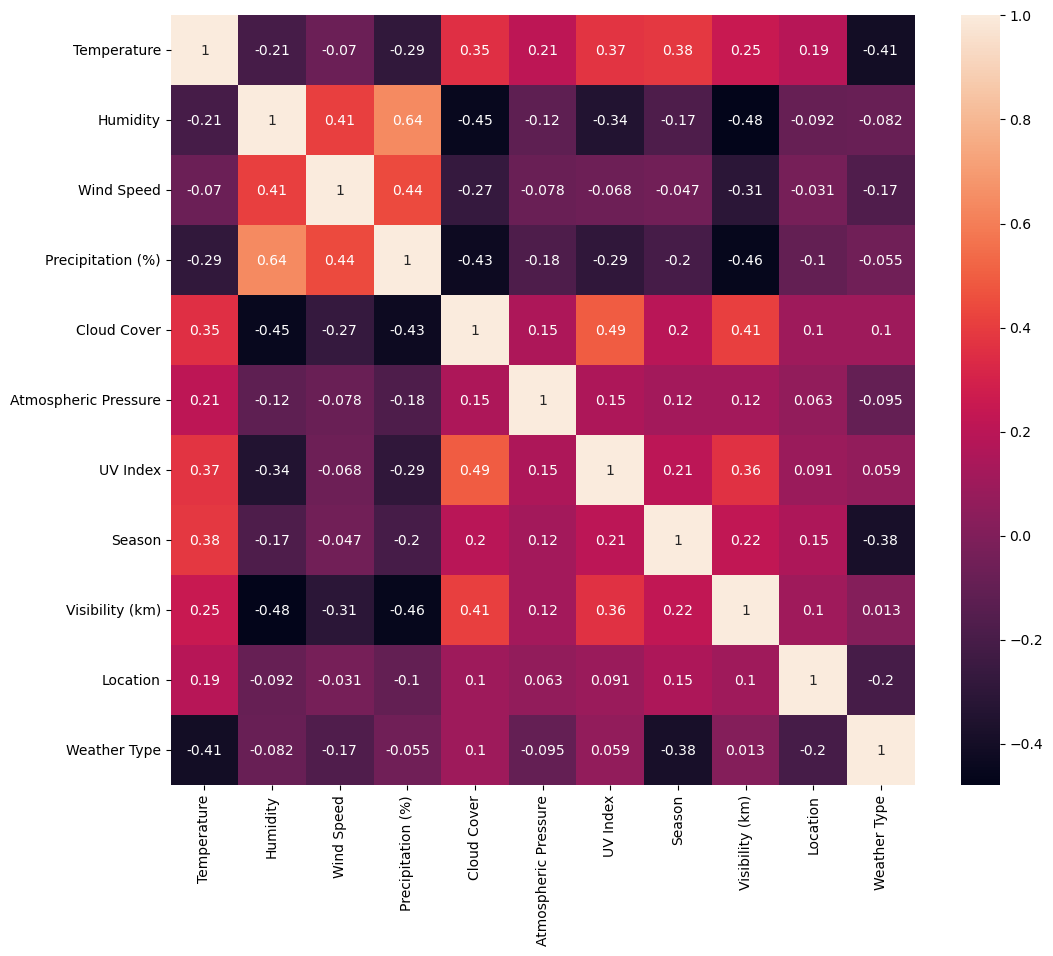

In [108]:
py.figure(figsize=(12,10))
sns.heatmap(weather.corr(), annot = True)

In [109]:
#weather = weather.drop(columns=["UV Index", "Visibility (km)"],axis=1)

In [110]:
weather.head(5)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,1,1010.82,2,0,3.5,0,0
1,39.0,96,8.5,71.0,1,1011.43,7,1,10.0,0,1
2,30.0,64,7.0,16.0,2,1018.72,5,1,5.5,1,2
3,38.0,83,1.5,82.0,2,1026.25,7,1,1.0,2,2
4,27.0,74,17.0,66.0,0,990.67,1,0,2.5,1,0


In [111]:
x = weather.drop("Weather Type", axis = 1)
y = weather["Weather Type"]

In [112]:
x.head(5)


,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
0,14.0,73,9.5,82.0,1,1010.82,2,0,3.5,0
1,39.0,96,8.5,71.0,1,1011.43,7,1,10.0,0
2,30.0,64,7.0,16.0,2,1018.72,5,1,5.5,1
3,38.0,83,1.5,82.0,2,1026.25,7,1,1.0,2
4,27.0,74,17.0,66.0,0,990.67,1,0,2.5,1


In [113]:
x.shape

(13200, 10)

In [114]:
y.head(5)

0    0
1    1
2    2
3    2
4    0
Name: Weather Type, dtype: int64

In [115]:
y.shape

(13200,)

In [116]:
x_train, x_test ,y_train,y_test = train_test_split(x, y, test_size=0.2 , random_state= 22, stratify=y)

In [117]:
x_train.shape

(10560, 10)

In [118]:
x_test.shape

(2640, 10)

## LogisticRegression

In [119]:
log_cls = LogisticRegression()
log_cls

LogisticRegression()

In [120]:
log_cls.fit(x_train, y_train)

C:\Users\orchi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [121]:
y_pred = log_cls.predict(x_test)
y_pred_train = log_cls.predict(x_train)


In [122]:
print("--------------------------------------------------Testing Evalution-----------------------------------------------------")
cnf_matrix = confusion_matrix(y_pred,y_test)
print("Confusion Matrix\n",cnf_matrix)

print("=="*60)

accuracy = accuracy_score(y_pred,y_test)
print("Accuracy \n", accuracy)
print("=="*60)

clf_report = classification_report(y_pred , y_test)
print("Classification Report \n",clf_report)

print("--------------------------------------------------Training Evalution-----------------------------------------------------")

clf_matrix = confusion_matrix(y_train, y_pred_train)
print("confusion matrix\n",clf_matrix)
print("=="*60)

accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy \n",accuracy)
print("=="*60)

clf_report = classification_report(y_train ,y_pred_train)
print("classification report \n",clf_report)

--------------------------------------------------Testing Evalution-----------------------------------------------------
Confusion Matrix
 [[577  71  55   9]
 [ 33 497  57  16]
 [ 17  70 529  17]
 [ 33  22  19 618]]
Accuracy 
 0.8412878787878788
Classification Report 
               precision    recall  f1-score   support

           0       0.87      0.81      0.84       712
           1       0.75      0.82      0.79       603
           2       0.80      0.84      0.82       633
           3       0.94      0.89      0.91       692

    accuracy                           0.84      2640
   macro avg       0.84      0.84      0.84      2640
weighted avg       0.85      0.84      0.84      2640

--------------------------------------------------Training Evalution-----------------------------------------------------
confusion matrix
 [[2264  135  114  127]
 [ 294 1996  253   97]
 [ 208  198 2155   79]
 [  49   50  102 2439]]
Accuracy 
 0.8384469696969697
classification report 
         

## KNN

In [123]:
knn_model = KNeighborsClassifier()


In [124]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [125]:
y_train = knn_model.predict(x_train)

In [126]:
y_train

array([2, 2, 2, ..., 1, 0, 3], dtype=int64)

In [127]:
y_pred = log_cls.predict(x_test)
y_pred_train = log_cls.predict(x_train)

In [128]:
print("--------------------------------------------------Testing Evalution-----------------------------------------------------")

cnf_matrix = confusion_matrix(y_pred,y_test)
print("confusion matrix \n",cnf_matrix)
print("--"*60)

accuracy = accuracy_score(y_pred , y_test)
print("Accuracy \n",accuracy)
print("--"*60)

clf_report = classification_report(y_pred , y_test)
print("classification report \n", clf_report)

print("--------------------------------------------------Testing Evalution-----------------------------------------------------")

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("confusion matrix \n",cnf_matrix)
print("--"*60)

accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy \n",accuracy)
print("--"*60)

clf_report = classification_report(y_train, y_pred_train)
print("classification report \n",clf_report)


--------------------------------------------------Testing Evalution-----------------------------------------------------
confusion matrix 
 [[577  71  55   9]
 [ 33 497  57  16]
 [ 17  70 529  17]
 [ 33  22  19 618]]
------------------------------------------------------------------------------------------------------------------------
Accuracy 
 0.8412878787878788
------------------------------------------------------------------------------------------------------------------------
classification report 
               precision    recall  f1-score   support

           0       0.87      0.81      0.84       712
           1       0.75      0.82      0.79       603
           2       0.80      0.84      0.82       633
           3       0.94      0.89      0.91       692

    accuracy                           0.84      2640
   macro avg       0.84      0.84      0.84      2640
weighted avg       0.85      0.84      0.84      2640

--------------------------------------------------Te

## Decision tree 

In [129]:
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_train = tree.predict(x_test)
y_pred_train = tree.predict(x_train)

In [130]:
print("--------------------------------------------------Testing Evalution-----------------------------------------------------")

cnf_matrix = confusion_matrix(y_pred,y_test)
print("confusion matrix \n",cnf_matrix)
print("--"*60)

accuracy = accuracy_score(y_pred , y_test)
print("Accuracy \n",accuracy)
print("--"*60)

clf_report = classification_report(y_pred , y_test)
print("classification report \n", clf_report)

print("--------------------------------------------------Testing Evalution-----------------------------------------------------")

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("confusion matrix \n",cnf_matrix)
print("--"*60)

accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy \n",accuracy)
print("--"*60)

clf_report = classification_report(y_train, y_pred_train)
print("classification report \n",clf_report)


--------------------------------------------------Testing Evalution-----------------------------------------------------
confusion matrix 
 [[577  71  55   9]
 [ 33 497  57  16]
 [ 17  70 529  17]
 [ 33  22  19 618]]
------------------------------------------------------------------------------------------------------------------------
Accuracy 
 0.8412878787878788
------------------------------------------------------------------------------------------------------------------------
classification report 
               precision    recall  f1-score   support

           0       0.87      0.81      0.84       712
           1       0.75      0.82      0.79       603
           2       0.80      0.84      0.82       633
           3       0.94      0.89      0.91       692

    accuracy                           0.84      2640
   macro avg       0.84      0.84      0.84      2640
weighted avg       0.85      0.84      0.84      2640

--------------------------------------------------Te